In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test = pd.read_csv('test.csv')

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train_data = train.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Name'], axis='columns')

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
test_data = test.drop(['PassengerId', 'Ticket', 'Cabin', 'Embarked', 'Name'], axis='columns')

test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875


      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0.5, 0, 'Sex')

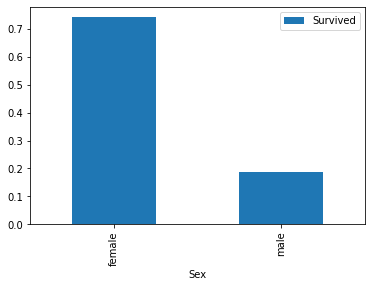

In [11]:
sex_survived=train_data[["Sex", "Survived"]].groupby(['Sex'], as_index=False) \
    .mean().sort_values(by='Survived', ascending=False)

print(sex_survived)
sex_survived.plot("Sex",kind="bar").set_xlabel("Sex")

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Text(0.5, 0, 'Pclass')

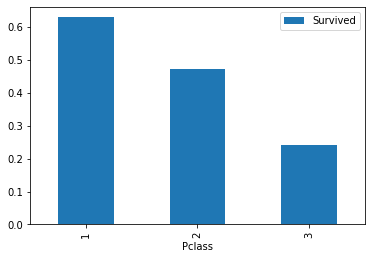

In [12]:
pclass_survived=train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)\
    .mean().sort_values(by='Survived', ascending=False)

print(pclass_survived)
pclass_survived.plot("Pclass",kind="bar").set_xlabel("Pclass")

(array([27.,  9.,  4., 15., 27., 36., 30., 35., 35., 17., 12., 12., 14.,
         7.,  5.,  4.,  0.,  0.,  0.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <BarContainer object of 20 artists>)

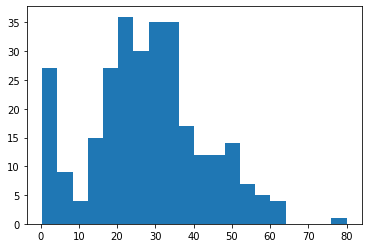

In [13]:
survived = train_data["Survived"] == 1
age = train_data[survived]["Age"]

plt.hist(age, bins=20)

(array([ 13.,   5.,  11.,   5.,  51.,  48.,  56., 179.,  30.,  34.,  28.,
        17.,  23.,  15.,   7.,   8.,   7.,   6.,   2.,   4.]), array([ 1.  ,  4.65,  8.3 , 11.95, 15.6 , 19.25, 22.9 , 26.55, 30.2 ,
       33.85, 37.5 , 41.15, 44.8 , 48.45, 52.1 , 55.75, 59.4 , 63.05,
       66.7 , 70.35, 74.  ]), <BarContainer object of 20 artists>)


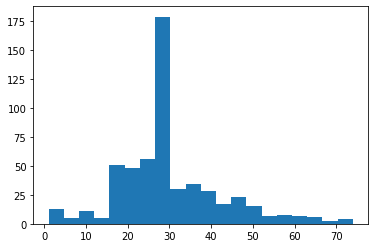

In [34]:
survived = train_data["Survived"] == 0
age = train_data[survived]["Age"]

print(plt.hist(age, bins=20))

In [15]:
train_data['Age'].fillna(train_data['Age'].dropna().median(), inplace=True)

In [16]:
train_data['Sex'] = train_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [17]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [18]:
test_data['Age'].fillna(test_data['Age'].dropna().median(), inplace=True)

In [19]:
test_data['Sex'] = test_data['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [20]:
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

In [21]:
test_data.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [22]:
x_train = train_data.drop('Survived', axis='columns')
y_train = train_data['Survived']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_input, test_input, train_target, test_target = train_test_split(x_train, y_train, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_input, train_target)

KNeighborsClassifier(n_neighbors=3)

In [27]:
print(knn.score(train_input, train_target))
print(knn.score(test_input, test_target))

0.8398203592814372
0.6995515695067265


In [28]:
from sklearn.neural_network import MLPClassifier

In [29]:
mlp = MLPClassifier()
mlp.fit(train_input, train_target)

/opt/anaconda3/envs/inhatc_machine/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [30]:
print(mlp.score(train_input, train_target))
print(mlp.score(test_input, test_target))

0.8323353293413174
0.8071748878923767


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(train_input, train_target)

RandomForestClassifier()

In [37]:
print(rfc.score(train_input, train_target))
print(rfc.score(test_input, test_target))

0.9805389221556886
0.7802690582959642


In [38]:
result = mlp.predict(test_data)

In [39]:
result_data = test_data.assign(mlp=result)
result_data.head(15)

,Pclass,Sex,Age,SibSp,Parch,Fare,mlp
0,3,0,34.5,0,0,7.8292,0
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,0
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,1
5,3,0,14.0,0,0,9.2250,0
6,3,1,30.0,0,0,7.6292,1
7,2,0,26.0,1,1,29.0000,0
8,3,1,18.0,0,0,7.2292,1
9,3,0,21.0,2,0,24.1500,0
